In [172]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

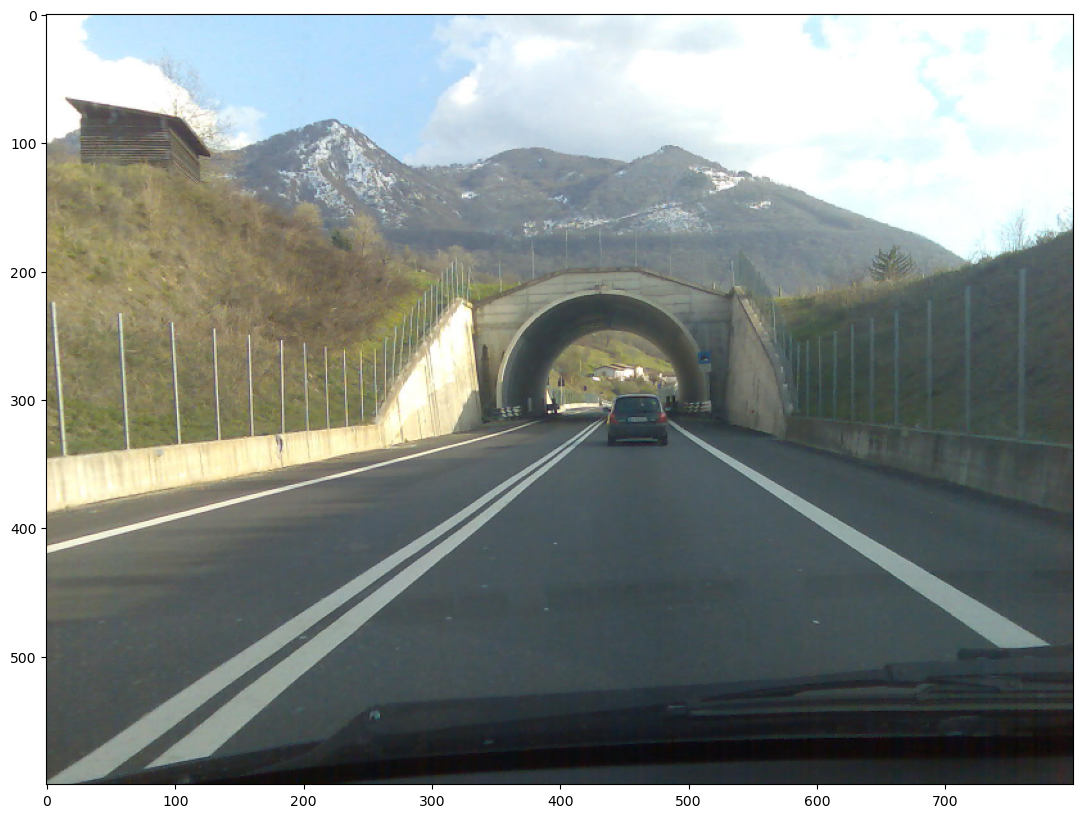

In [173]:
img = cv2.imread('data/dashcam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)

(<Axes: title={'center': 'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

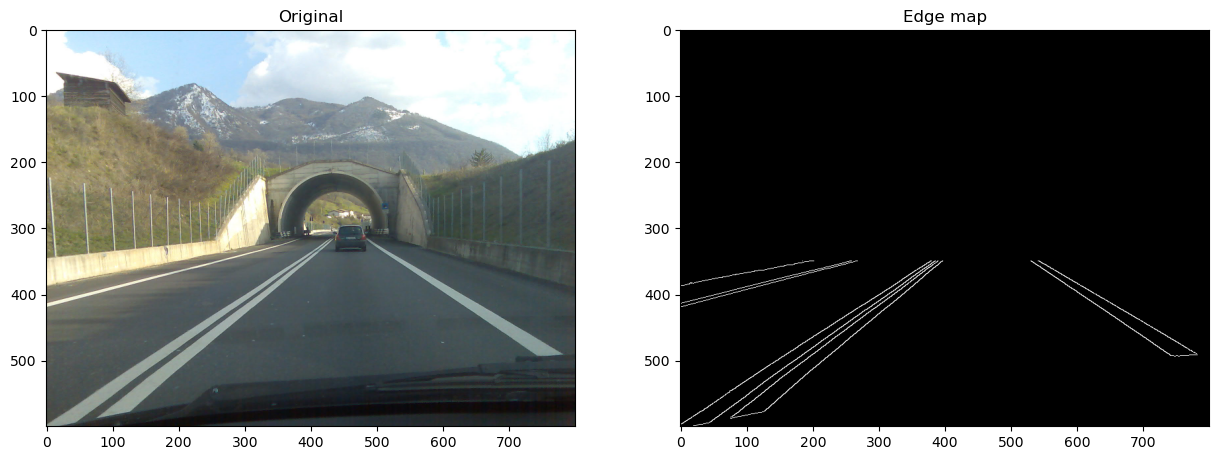

In [174]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=550)
edges[0:350] = 0
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

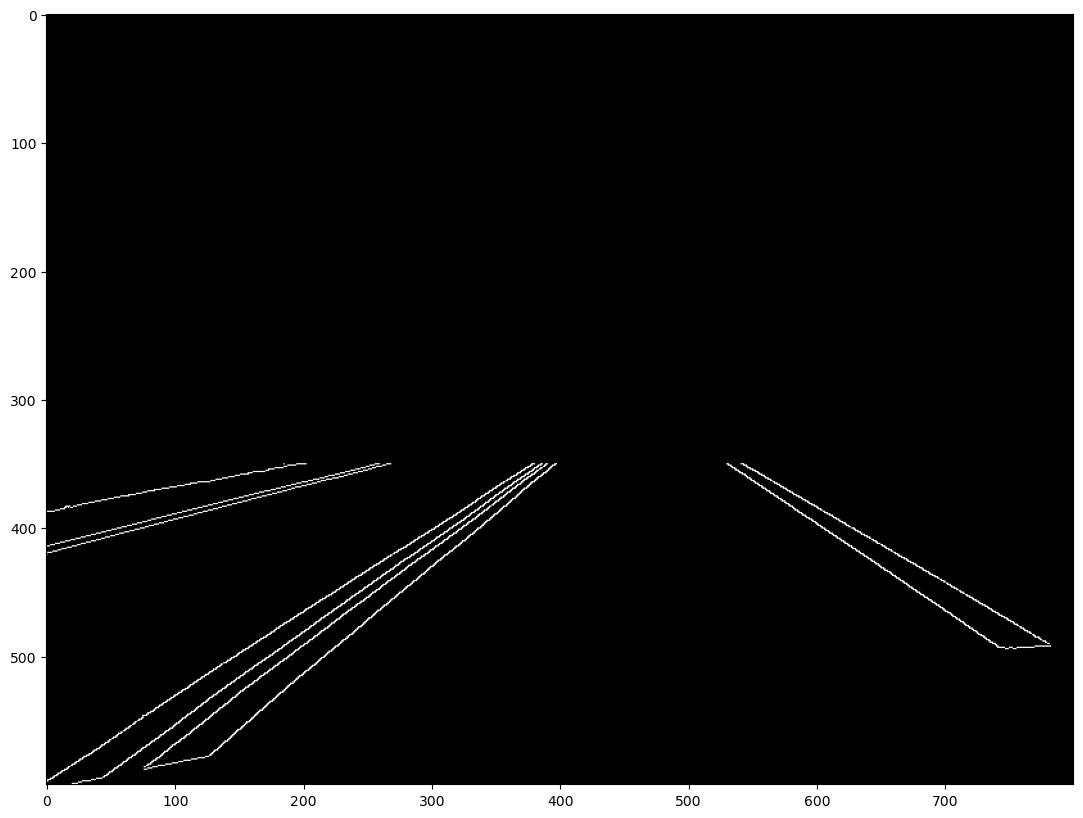

In [175]:
edges[0:350] = 0 
plt.imshow(edges, cmap='gray')

In [176]:
lines = cv2.HoughLines(edges, rho=2, theta=2*np.pi/180, threshold = 190)
lines = lines[:, 0, :]
print(len(lines[:]))

10


(<Axes: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

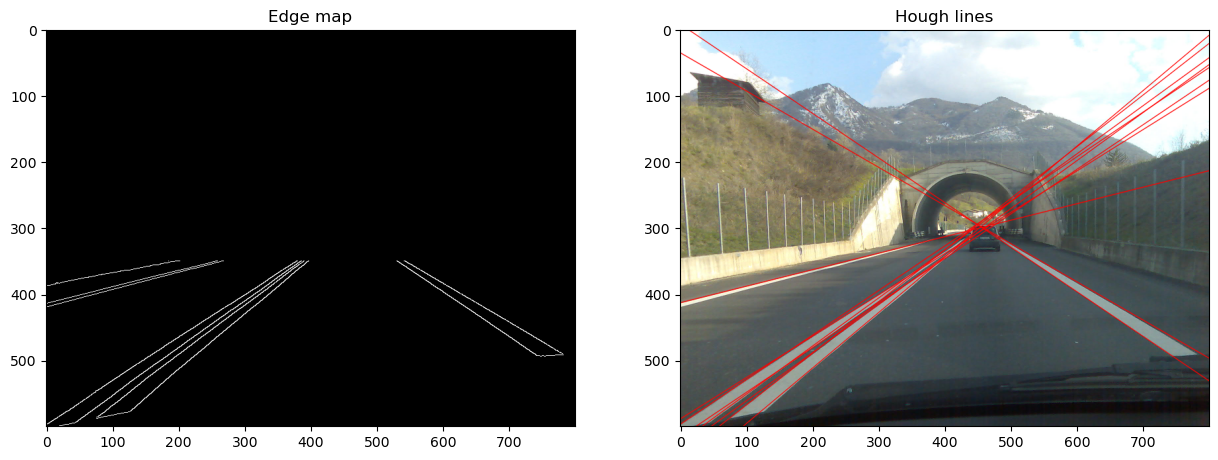

In [177]:
result = np.copy(img)
for line in lines:    
    rho = line[0]
    theta = line[1]
    #print(rho, theta)
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [195]:
# Filter out all lines that are approximately horizontal (+/- 20 degrees). 
filtered_lines = []
for line in lines:
    theta = line[1]
    if 160*np.pi/180 >theta> 20*np.pi/180:
        filtered_lines.append(line)
        #print(theta)
print("before filtering - ",len(lines[:]))        
print("after filtering - ",len(filtered_lines[:]))        

before filtering -  10
after filtering -  10


10


(<Axes: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

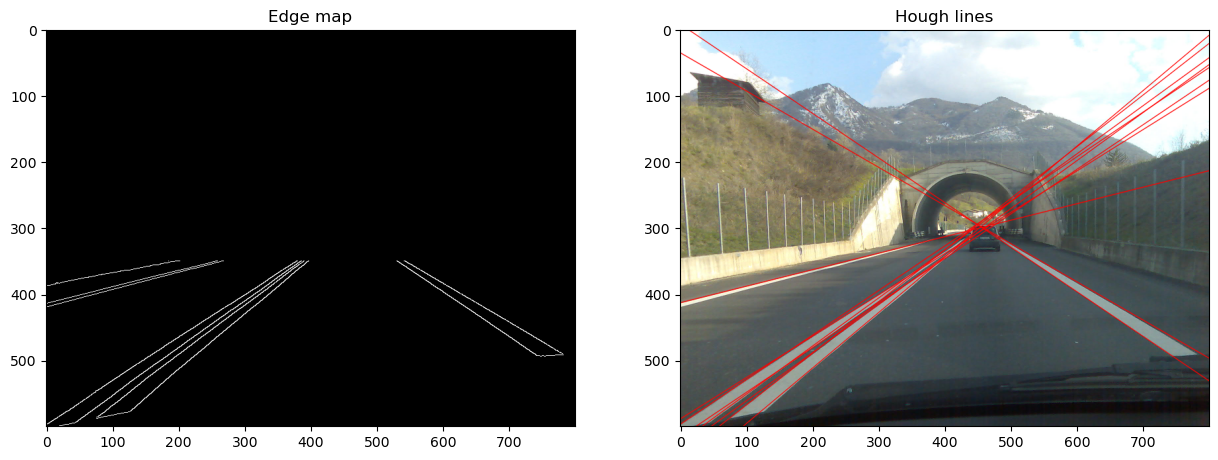

In [179]:
result = np.copy(img)
for line in filtered_lines:
    rho = line[0]
    theta = line[1]
    #print(rho, theta)
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [211]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(filtered_lines)
#kmeans = KMeans(n_clusters=3).fit(filtered_lines)
kmeans.cluster_centers_
#print("before clustering - ", len(filtered_lines))
#print("after clustering - ", len(kmeans.cluster_centers_))

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[509.5       ,   0.94247778],
       [ -7.        ,   2.16420817],
       [401.        ,   1.32645023],
       [ 31.        ,   2.09439516],
       [497.        ,   0.99483767],
       [521.        ,   0.87266463]])

(<Axes: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

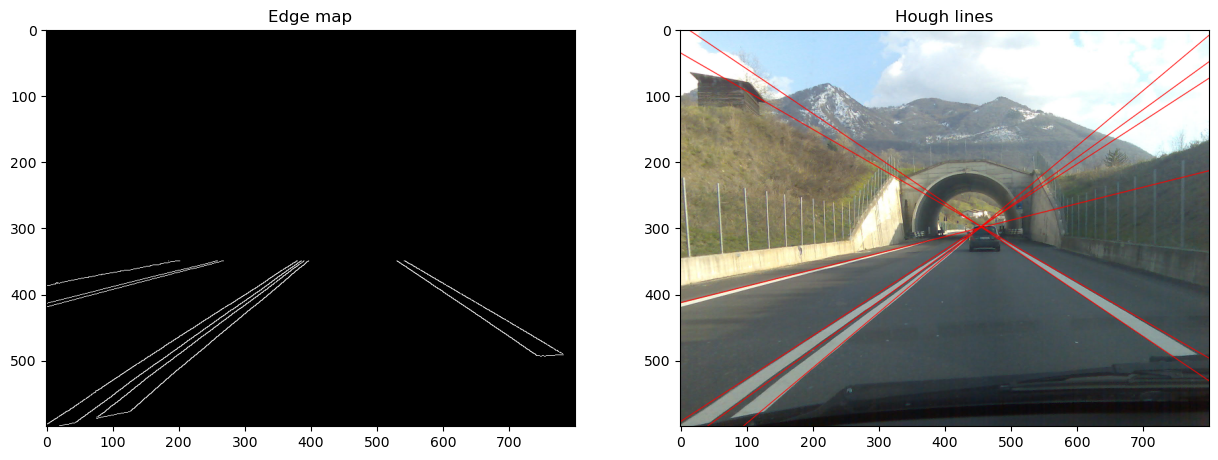

In [207]:
result = np.copy(img)
    
for line in kmeans.cluster_centers_:
    rho = line[0]
    theta = line[1]
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')